In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dati2.csv')
volt       = df["volt"].to_numpy()
ampere     = df["ampere"].to_numpy()
err_volt   = df["errore_volt"].to_numpy()
err_ampere = df["errore_ampere"].to_numpy()

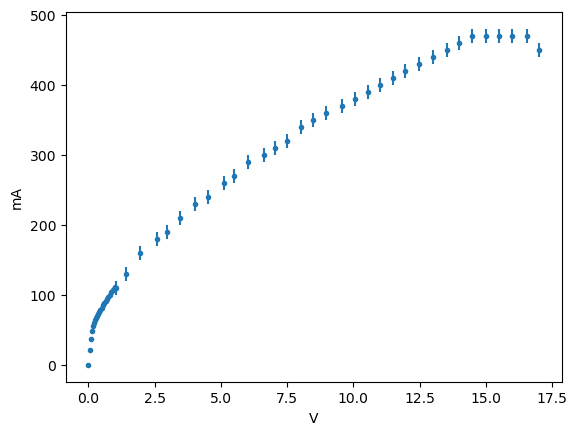

In [3]:
plt.xlabel(r'V')
plt.ylabel(r'mA')

plt.errorbar(volt, ampere, xerr = err_volt, yerr = err_ampere, fmt= '.')
plt.show()

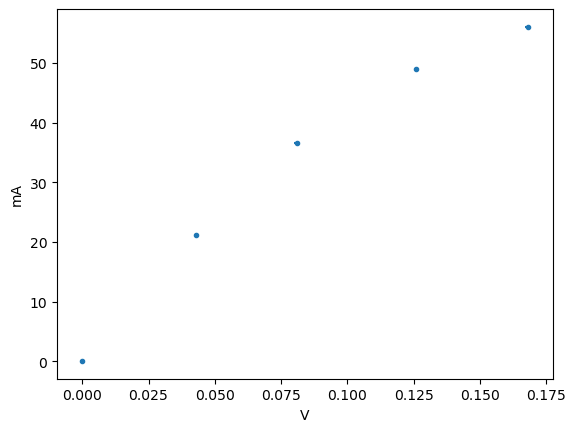

In [4]:
plt.xlabel(r'V')
plt.ylabel(r'mA')

plt.errorbar(volt[0:5], ampere[0:5], xerr = err_volt[0:5], yerr = err_ampere[0:5], fmt= '.')
plt.show()

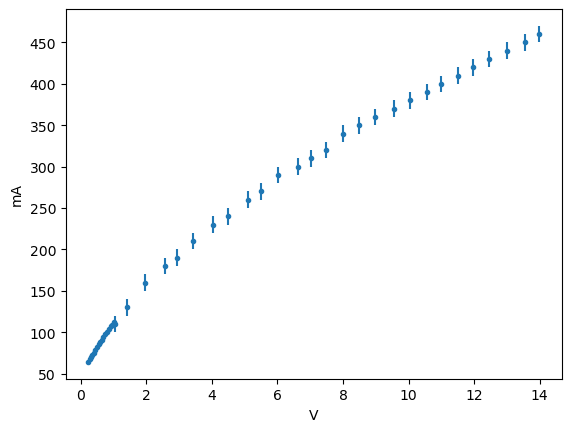

In [5]:
plt.xlabel(r'V')
plt.ylabel(r'mA')

plt.errorbar(volt[6:50], ampere[6:50], xerr = err_volt[6:50], yerr = err_ampere[6:50], fmt= '.')
plt.show()

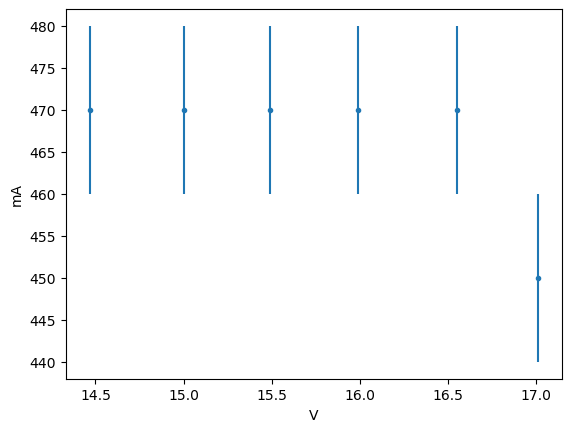

In [6]:
plt.xlabel(r'V')
plt.ylabel(r'mA')

plt.errorbar(volt[50:], ampere[50:], xerr = err_volt[50:], yerr = err_ampere[50:], fmt= '.')
plt.show()

Coefficiente angolare (m): 11763.415069101096
Intercetta (c): 788.1588983447336


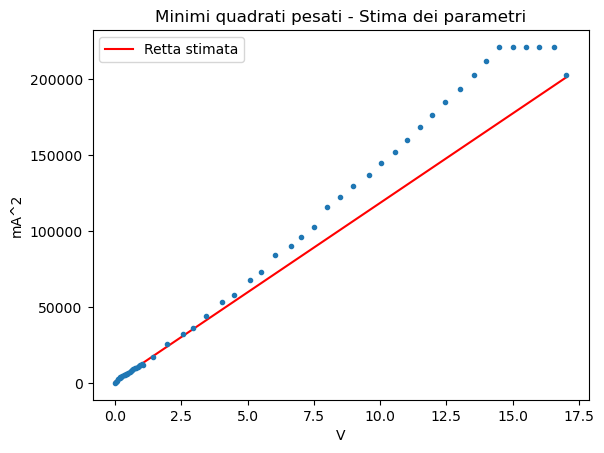

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Dati: serie di punti (x, y) e incertezze su y (sigma_y)
x = volt  # Dati su x
y = np.square(ampere) # Dati su y
sigma_y = np.square(err_ampere)  # Incertezze su y

# Calcolo dei pesi: w_i = 1 / sigma_y_i^2
w = 1 / sigma_y**2

# Medie pesate
x_w_mean = np.sum(w * x) / np.sum(w)
y_w_mean = np.sum(w * y) / np.sum(w)

# Calcolo del coefficiente angolare (m)
numerator = np.sum(w * (x - x_w_mean) * (y - y_w_mean))
denominator = np.sum(w * (x - x_w_mean)**2)
m = numerator / denominator

# Calcolo dell'intercetta (c)
c = y_w_mean - m * x_w_mean

print(f"Coefficiente angolare (m): {m}")
print(f"Intercetta (c): {c}")

# Retta stimata
y_pred = m * x + c

# Visualizzazione dei dati con incertezze e della retta stimata
plt.errorbar(x, y, yerr=sigma_y, fmt='.')
plt.plot(x, y_pred, color='red', label='Retta stimata')
plt.xlabel("V")
plt.ylabel(r"mA^2")
plt.legend()
plt.title("Minimi quadrati pesati - Stima dei parametri")
plt.show()